<a href="https://colab.research.google.com/github/pranj-mach/birthday/blob/main/Deep_learning_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import torch
import numpy as np
import pandas as pd

In [76]:
# Now next part


In [77]:
#start

Create a neural Network

In [78]:
import torch.nn as nn
import torch.nn.functional as F

In [79]:
#Create a model class that inherits nn.Module

In [104]:
class Model(nn.Module):
  #Input layer(4 features of flower)->H1(hidden layer 1)-->H2(hidden layer 2)-->output(3 clases of iris flowers)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__() #instantiate our nn.module
  #fc- fully connected
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

In [182]:
torch.manual_seed(51)
model=Model()

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

In [127]:
my_df=pd.read_csv(url)

In [128]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [129]:
my_df['species']=my_df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})

<ipython-input-129-0b856b445205>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})


In [130]:
my_df['species']

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [131]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [132]:
# Train Test Split, Set X,y

In [133]:
x=my_df.drop('species',axis=1).values

In [134]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [136]:
y=my_df['species'].values

In [137]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [138]:
# To run train test split we need sckit learn
from sklearn.model_selection import train_test_split

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=51)

In [210]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [211]:
## Set the criterion of our model to measure the error, how far off the prediction are
criterion = nn.CrossEntropyLoss()
#Choose Adam optimiser, lr =learning rate(if error does not go down after a bunch of iteration
# we can lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr=0.0015)

In [212]:
 # Train our model

 epoch=200
 losses=[]
 for i in range(200):
  y_pred = model.forward(x_train)
  #measure the loss/error, gonna be high at first
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  #print per 10 epochs
  if i % 10 ==0:
    print(f'Epoch: {i} and loss:{loss}')
    # Do some back propogation : take the error rate of forward propogation and feed it back thru the network to fine tune the weights
    optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss:0.052175626158714294
Epoch: 10 and loss:0.0590161457657814
Epoch: 20 and loss:0.05555662512779236
Epoch: 30 and loss:0.055844880640506744
Epoch: 40 and loss:0.06667179614305496
Epoch: 50 and loss:0.049183763563632965
Epoch: 60 and loss:0.06599029153585434
Epoch: 70 and loss:0.047983311116695404
Epoch: 80 and loss:0.061558324843645096
Epoch: 90 and loss:0.05027616769075394
Epoch: 100 and loss:0.05423741042613983
Epoch: 110 and loss:0.05511954799294472
Epoch: 120 and loss:0.04910321906208992
Epoch: 130 and loss:0.0573592372238636
Epoch: 140 and loss:0.04671745002269745
Epoch: 150 and loss:0.05625223368406296
Epoch: 160 and loss:0.04922816529870033
Epoch: 170 and loss:0.049891795963048935
Epoch: 180 and loss:0.054471682757139206
Epoch: 190 and loss:0.046153172850608826


Text(0.5, 0, 'Epoch')

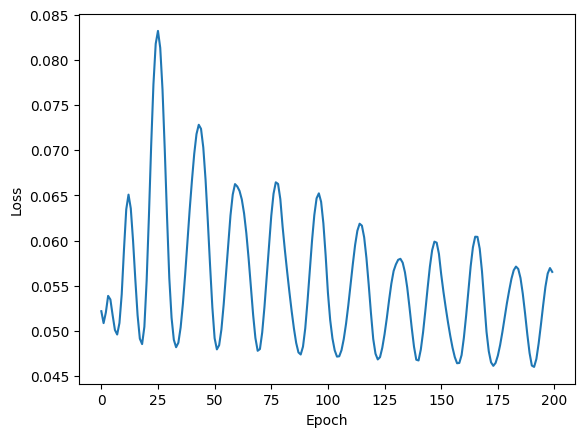

In [213]:
plt.plot(range(epoch),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [214]:
with torch.no_grad(): # turn off back propogation
  y_eval=model.forward(x_test) #features for test set
  loss=criterion(y_eval,y_test) #y_eval will be test result, and y_Test are values

In [215]:
loss

tensor(0.0621)

In [216]:
correct=0
with torch.no_grad():
 for i,data in enumerate(x_test):
  y_val=model.forward(data)
  print(f'{i+1}.  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

  #correct or not
  if y_val.argmax().item()==y_test[i]:
    correct+=1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.  tensor([-13.0139,   4.7187,  -0.8092]) 	 1 	 1
2.  tensor([-23.6132,   1.9871,   5.7799]) 	 2 	 2
3.  tensor([-8.0978,  5.7034, -3.5947]) 	 1 	 1
4.  tensor([ 29.7322,  18.0866, -30.4474]) 	 0 	 0
5.  tensor([-6.3367,  6.1907, -4.7471]) 	 1 	 1
6.  tensor([-28.7416,   2.5731,   6.8468]) 	 2 	 2
7.  tensor([-26.5473,   3.3497,   5.3125]) 	 2 	 2
8.  tensor([-28.2477,   2.1198,   7.1605]) 	 2 	 2
9.  tensor([ 28.9725,  17.6580, -29.7109]) 	 0 	 0
10.  tensor([-19.3961,   3.1373,   3.1463]) 	 2 	 2
11.  tensor([-20.0384,   2.9874,   3.5375]) 	 2 	 2
12.  tensor([ 27.6653,  16.9229, -28.4273]) 	 0 	 0
13.  tensor([-12.0096,   5.2293,  -1.7264]) 	 1 	 1
14.  tensor([-20.5800,   2.9070,   3.8081]) 	 2 	 2
15.  tensor([-27.3651,   2.0675,   6.9259]) 	 2 	 2
16.  tensor([-18.8389,   3.1763,   2.9188]) 	 1 	 1
17.  tensor([-21.7602,   2.5492,   4.5826]) 	 2 	 2
18.  tensor([-29.1606,   2.1738,   7.4031]) 	 2 	 2
19.  tensor([-30.9549,   2.5987,   7.5458]) 	 2 	 2
20.  tensor([ 23.9573,  14.

In [217]:
new_iris=torch.tensor([6.6,3.7,2.2,1.5])

In [218]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([ 20.9080,  13.4985, -22.2748])
0


In [219]:
# save our load our model
torch.save(model.state_dict(),'pranjal_iris_model.pt')
#

In [220]:
#Load the save model
new_model= Model()
new_model.load_state_dict(torch.load('pranjal_iris_model.pt'))

<ipython-input-220-59446b52590e>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('pranjal_iris_model.pt'))


<All keys matched successfully>

In [221]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)